In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import statistics as stats
from scipy import stats as stats2
import datetime

In [2]:
data = pd.read_csv('no_outliers/pow_cons_new1.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


### changing to the date time format

In [3]:
data['date_time'] = pd.to_datetime(data['date_time'])

In [4]:
data['date_time']

0       2009-04-13 21:18:00
1       2008-05-17 03:59:00
2       2007-01-24 01:41:00
3       2008-08-25 23:04:00
4       2008-12-18 04:44:00
                ...        
14392   2007-07-15 21:21:00
14393   2007-11-20 16:47:00
14394   2008-02-09 02:32:00
14395   2007-09-05 01:24:00
14396   2009-09-15 01:45:00
Name: date_time, Length: 14397, dtype: datetime64[ns]

In [5]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.322,0.204,238.70,14.2,2009-04-13 21:18:00,35.0
1,0.328,0.232,241.38,1.6,2008-05-17 03:59:00,1.0
2,0.298,0.112,245.59,1.2,2007-01-24 01:41:00,0.0
3,0.082,0.000,241.01,0.2,2008-08-25 23:04:00,1.0
4,0.336,0.078,245.62,1.4,2008-12-18 04:44:00,1.0


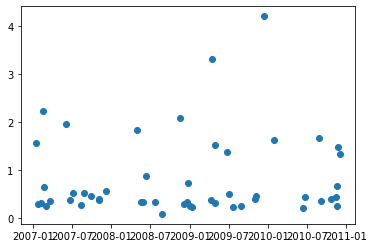

In [6]:
plt.plot_date(x=data['date_time'][:50].dt.date,y=data['Global_active_power'][:50])

In [1]:
# for i in data['date_time']:
#     print(i.strftime("%d %b %Y -- %H %M %S %p | "),i)

In [8]:
data.sort_values(by='date_time',ascending=True,inplace=True)

In [9]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
807,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
4600,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
1045,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
4545,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
10246,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


In [10]:
data.reset_index(inplace=True)

In [11]:
data.head()

,index,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,807,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
1,4600,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
2,1045,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
3,4545,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
4,10246,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


In [12]:
data.drop(columns='index',axis=1,inplace=True)

In [13]:
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,date_time,meterings
0,3.432,0.000,234.69,14.6,2006-12-16 19:12:00,17.0
1,3.406,0.000,233.91,14.4,2006-12-16 19:17:00,19.0
2,3.474,0.168,236.28,14.6,2006-12-16 21:54:00,18.0
3,0.388,0.234,246.17,1.8,2006-12-17 02:21:00,0.0
4,3.460,0.000,243.03,14.2,2006-12-17 04:33:00,19.0


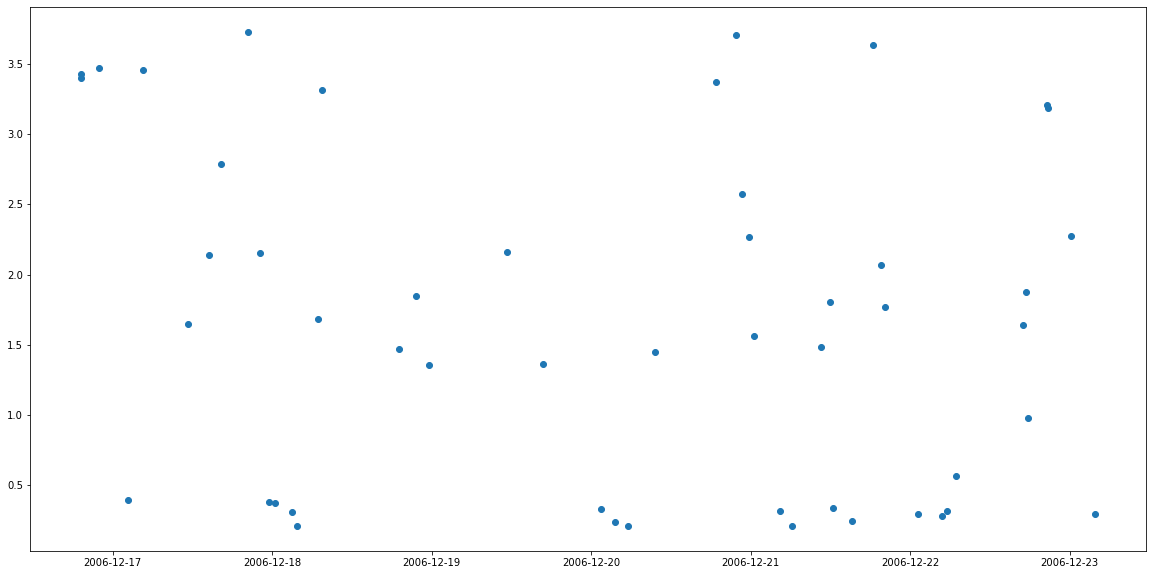

In [14]:
plt.figure(figsize=(20, 10))
plt.plot_date(x=data['date_time'][:50],y=data['Global_active_power'][:50])

In [15]:
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meterings
count,14397.000000,14397.000000,14397.000000,14397.000000,14397.000000
mean,0.995290,0.122642,240.981193,4.217031,7.315899
std,0.887389,0.111059,3.142006,3.710276,9.513796
min,0.078000,0.000000,226.180000,0.200000,0.000000
25%,0.304000,0.048000,239.200000,1.400000,0.000000
50%,0.556000,0.100000,241.080000,2.400000,1.000000
75%,1.474000,0.192000,242.970000,6.200000,18.000000
max,6.704000,1.108000,253.070000,29.000000,44.000000


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14397 entries, 0 to 14396
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Global_active_power    14397 non-null  float64       
 1   Global_reactive_power  14397 non-null  float64       
 2   Voltage                14397 non-null  float64       
 3   Global_intensity       14397 non-null  float64       
 4   date_time              14397 non-null  datetime64[ns]
 5   meterings              14397 non-null  float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 675.0 KB


In [17]:
data.corr()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meterings
Global_active_power,1.000000,0.228764,-0.351498,0.998513,0.774472
Global_reactive_power,0.228764,1.000000,-0.089486,0.252543,0.155509
Voltage,-0.351498,-0.089486,1.000000,-0.364123,-0.290188
Global_intensity,0.998513,0.252543,-0.364123,1.000000,0.768760
meterings,0.774472,0.155509,-0.290188,0.768760,1.000000


<AxesSubplot:>

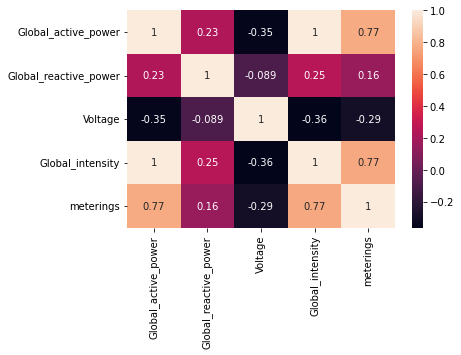

In [18]:
sns.heatmap(data.corr(),annot=True)

In [19]:
data.cov()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,meterings
Global_active_power,0.787459,0.022545,-0.980041,3.287561,6.538430
Global_reactive_power,0.022545,0.012334,-0.031226,0.104063,0.164310
Voltage,-0.980041,-0.031226,9.872199,-4.244834,-8.674408
Global_intensity,3.287561,0.104063,-4.244834,13.766145,27.136325
meterings,6.538430,0.164310,-8.674408,27.136325,90.512315


<AxesSubplot:>

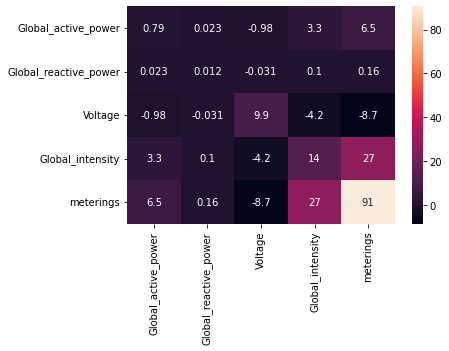

In [20]:
sns.heatmap(data.cov(),annot=True)

In [21]:
data.groupby(by=data['date_time'].dt.year).describe().T

date_time                          2006         2007         2008  \
Global_active_power   count  144.000000  3608.000000  3706.000000   
                      mean     1.928875     1.005999     0.960559   
                      std      1.383886     0.960227     0.897213   
                      min      0.204000     0.084000     0.078000   
                      25%      0.509500     0.272000     0.290500   
                      50%      1.787000     0.482000     0.506000   
                      75%      2.724500     1.478500     1.442000   
                      max      6.170000     5.956000     6.704000   
Global_reactive_power count  144.000000  3608.000000  3706.000000   
                      mean     0.148431     0.113547     0.116550   
                      std      0.125492     0.106913     0.106904   
                      min      0.000000     0.000000     0.000000   
                      25%      0.049500     0.000000     0.046000   
                      50%      0.133000     0.098000     0.096000   
                      75%      0.234000     0.176500     0.182000   
                      max      0.520000     0.950000     0.780000   
Voltage               count  144.000000  3608.000000  3706.000000   
                      mean   241.820556   239.481854   240.835869   
                      std      3.851546     3.447403     2.756019   
                      min    232.290000   226.180000   229.780000   
                      25%    239.270000   237.130000   239.170000   
                      50%    242.025000   239.830000   240.820000   
                      75%    244.512500   241.850000   242.600000   
                      max    249.780000   249.750000   249.640000   
Global_intensity      count  144.000000  3608.000000  3706.000000   
                      mean     8.137500     4.288803     4.076039   
                      std      5.775398     4.032945     3.759124   
                      min      0.800000     0.400000     0.200000   
                      25%      2.550000     1.200000     1.200000   
                      50%      7.700000     2.200000     2.400000   
                      75%     11.400000     6.200000     6.000000   
                      max     26.200000    25.800000    29.000000   
meterings             count  144.000000  3608.000000  3706.000000   
                      mean     9.958333     6.859479     6.681597   
                      std     10.543201     9.579078     9.235271   
                      min      0.000000     0.000000     0.000000   
                      25%      0.000000     0.000000     0.000000   
                      50%      4.500000     1.000000     1.000000   
                      75%     18.000000    17.000000    18.000000   
                      max     41.000000    44.000000    44.000000   

date_time                           2009         2010  
Global_active_power   count  3725.000000  3214.000000  
                      mean      0.999465     0.976650  
                      std       0.847977     0.777994  
                      min       0.124000     0.138000  
                      25%       0.316000     0.336000  
                      50%       0.586000     0.648000  
                      75%       1.480000     1.468000  
                      max       5.080000     6.150000  
Global_reactive_power count  3725.000000  3214.000000  
                      mean      0.129751     0.130480  
                      std       0.112772     0.116303  
                      min       0.000000     0.000000  
                      25%       0.054000     0.054000  
                      50%       0.106000     0.100000  
                      75%       0.204000     0.200000  
                      max       0.844000     1.108000  
Voltage               count  3725.000000  3214.000000  
                      mean    242.000703   241.612691  
                      std       2.855069     2.799969  
                      min     226.200000   229.740

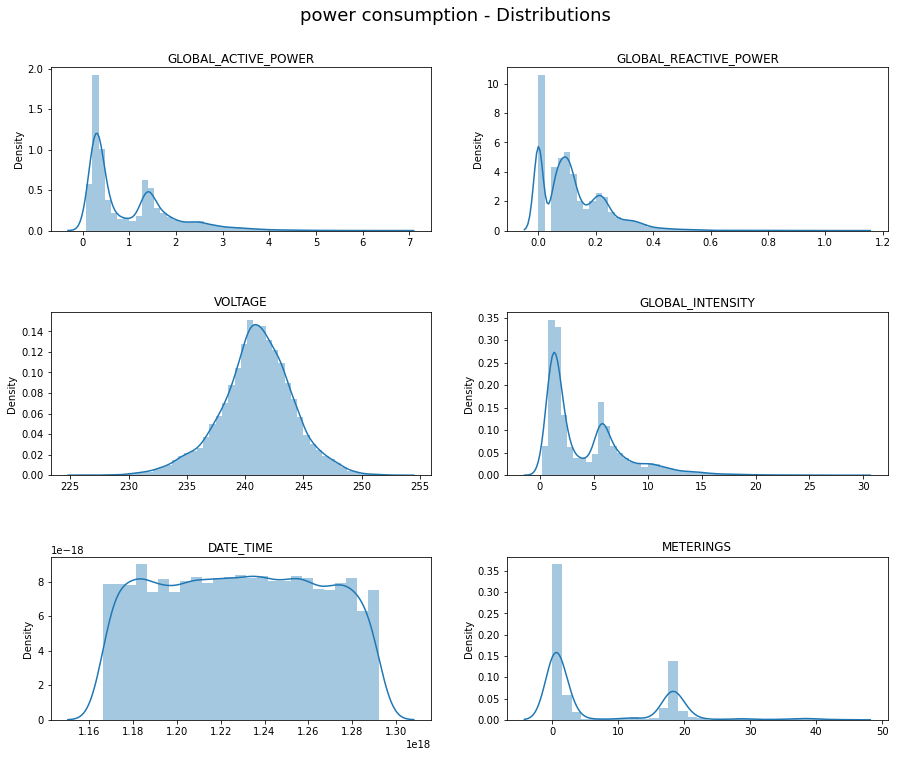

In [22]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("power consumption - Distributions", fontsize=18, y=0.95)

for col, ax in zip(data.columns.to_list(), axs.ravel()):
    sns.distplot(data[col],ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

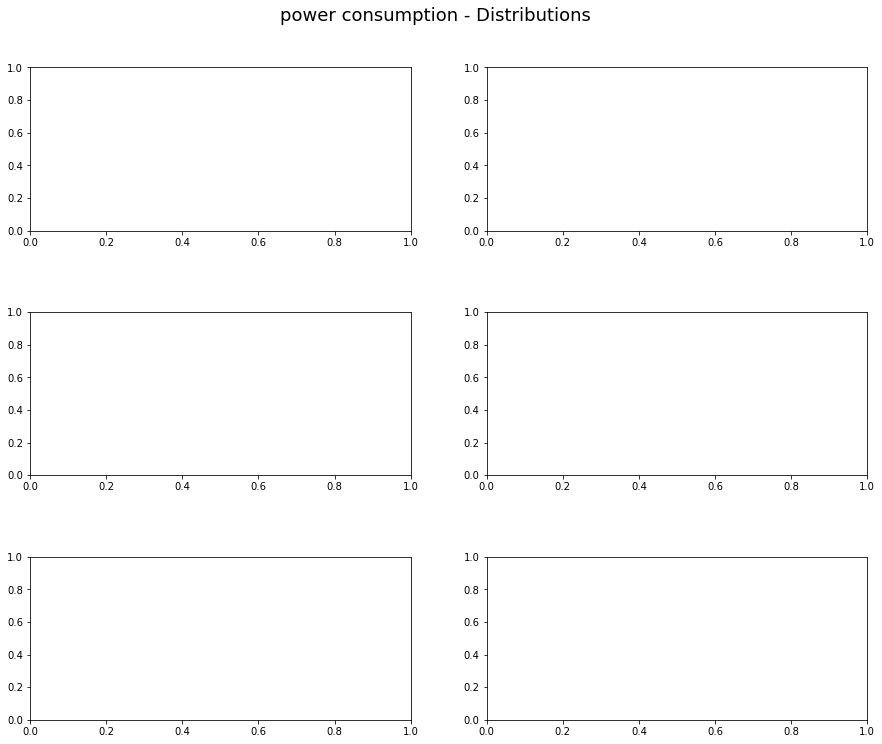

In [23]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("power consumption - Distributions", fontsize=18, y=0.95)

for col, ax in zip(data.columns.to_list(), axs.ravel()):
    stats2.probplot(data[col], plot=axs)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

NameError: name 'nsample' is not defined

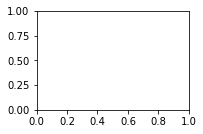

In [24]:
ax4 = plt.subplot(224)
x = stats2.norm.rvs(loc=0, scale=1, size=nsample, random_state=rng)
res = stats2.probplot(x, plot=plt)
plt.show()

In [25]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'date_time', 'meterings'],
      dtype='object')

<AxesSubplot:xlabel='Global_active_power', ylabel='Global_reactive_power'>

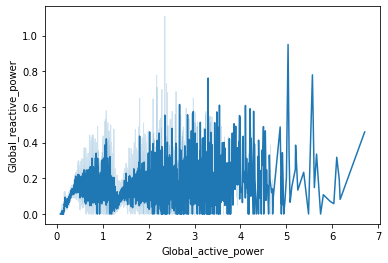

In [26]:
sns.lineplot(data=data,x='Global_active_power',y='Global_reactive_power')

<AxesSubplot:xlabel='Global_active_power', ylabel='Global_reactive_power'>

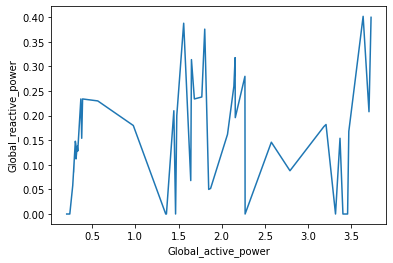

In [27]:
sns.lineplot(data=data[:50],x='Global_active_power',y='Global_reactive_power')

<AxesSubplot:xlabel='Global_reactive_power', ylabel='Voltage'>

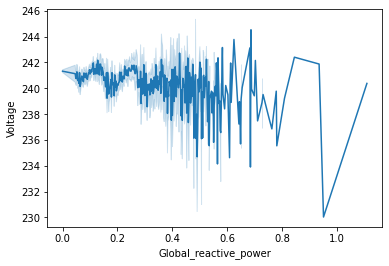

In [28]:
sns.lineplot(data=data,x='Global_reactive_power',y='Voltage')

<AxesSubplot:xlabel='Global_reactive_power', ylabel='Voltage'>

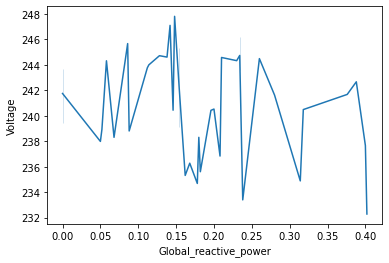

In [29]:
sns.lineplot(data=data[:50],x='Global_reactive_power',y='Voltage')

<AxesSubplot:xlabel='Voltage', ylabel='Global_intensity'>

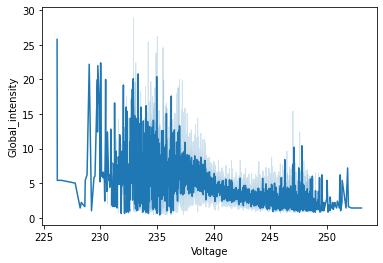

In [30]:
sns.lineplot(data=data,x='Voltage',y='Global_intensity')

<AxesSubplot:xlabel='Voltage', ylabel='Global_intensity'>

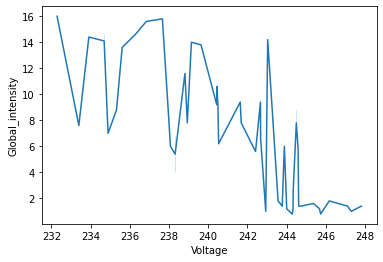

In [31]:
sns.lineplot(data=data[:50],x='Voltage',y='Global_intensity')

<AxesSubplot:xlabel='Global_intensity', ylabel='meterings'>

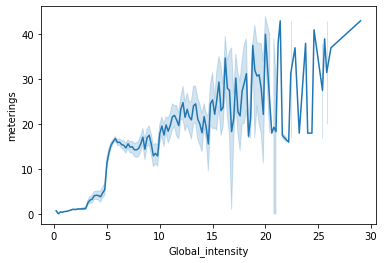

In [32]:
sns.lineplot(data=data,x='Global_intensity',y='meterings')

<AxesSubplot:xlabel='Global_intensity', ylabel='meterings'>

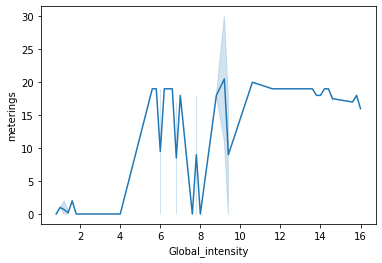

In [33]:
sns.lineplot(data=data[:50],x='Global_intensity',y='meterings')

In [34]:
data.columns

Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'date_time', 'meterings'],
      dtype='object')

<AxesSubplot:xlabel='Global_active_power', ylabel='meterings'>

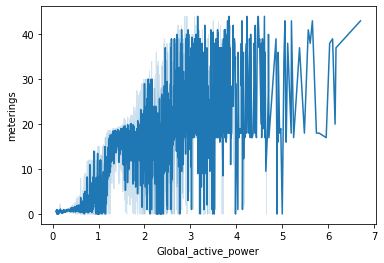

In [35]:
sns.lineplot(data=data,x='Global_active_power',y='meterings')

<AxesSubplot:xlabel='Global_active_power', ylabel='meterings'>

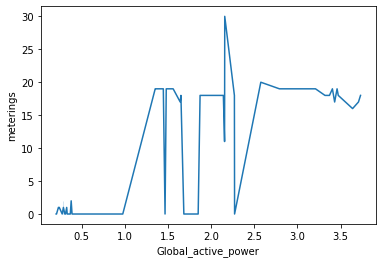

In [36]:
sns.lineplot(data=data[:50],x='Global_active_power',y='meterings')

<AxesSubplot:xlabel='Global_reactive_power', ylabel='meterings'>

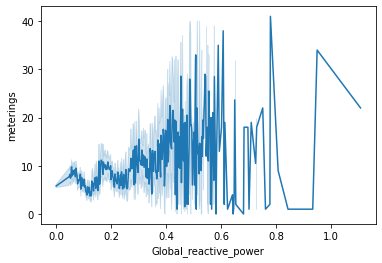

In [37]:
sns.lineplot(data=data,x='Global_reactive_power',y='meterings')

<AxesSubplot:xlabel='Global_reactive_power', ylabel='meterings'>

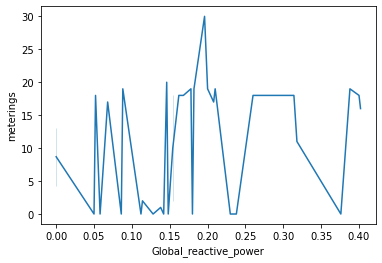

In [38]:
sns.lineplot(data=data[:50],x='Global_reactive_power',y='meterings')

<AxesSubplot:xlabel='Voltage', ylabel='meterings'>

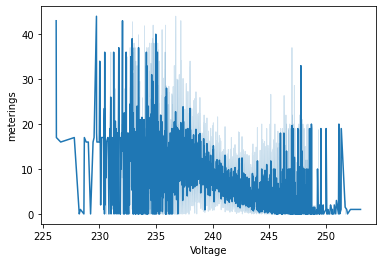

In [39]:
sns.lineplot(data=data,x='Voltage',y='meterings')

<AxesSubplot:xlabel='Voltage', ylabel='meterings'>

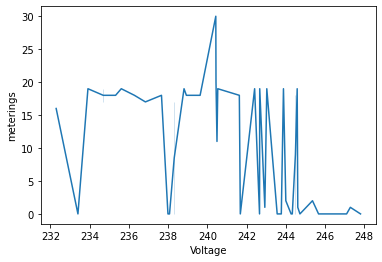

In [40]:
sns.lineplot(data=data[:50],x='Voltage',y='meterings')

<AxesSubplot:xlabel='Global_intensity', ylabel='meterings'>

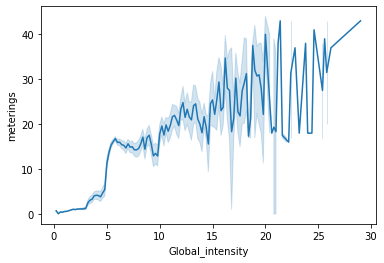

In [41]:
sns.lineplot(data=data,x='Global_intensity',y='meterings')

<AxesSubplot:xlabel='Global_intensity', ylabel='meterings'>

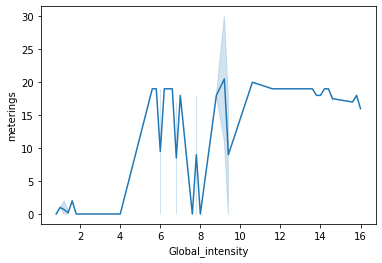

In [42]:
sns.lineplot(data=data[:50],x='Global_intensity',y='meterings')